Miłosz Błachowiak

**Lab 3 - Prior and Posterior predictive distributions**

In [1]:
import cmdstanpy
cmdstanpy.install_cmdstan()

from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Installing CmdStan version: 2.31.0
Install directory: /root/.cmdstan
Download successful, file: /tmp/tmp2k8hx8ti
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.31.0
Building version cmdstan-2.31.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Test model compilation
Installed cmdstan-2.31.0


**Modeling prior predictive distribution**

In [118]:
gen_quant = CmdStanModel(stan_file='code_1.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [119]:
# generating 1000 samples
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

DEBUG:cmdstanpy:cmd: /content/code_1 info
cwd: None
20:39:23 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_1', 'id=1', 'random', 'seed=3367', 'output', 'file=/tmp/tmp3l4h73mi/code_1glxdrt2h/code_1-20230329203923.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']


20:39:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=1, chain_ids=[1], num_processes=1
 cmd (chain 1):
	['/content/code_1', 'id=1', 'random', 'seed=3367', 'output', 'file=/tmp/tmp3l4h73mi/code_1glxdrt2h/code_1-20230329203923.csv', 'method=sample', 'num_samples=1000', 'num_warmup=0', 'algorithm=fixed_param']
 retcodes=[0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3l4h73mi/code_1glxdrt2h/code_1-20230329203923.csv
 console_msgs (if any):
	/tmp/tmp3l4h73mi/code_1glxdrt2h/code_1-20230329203923_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 0
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
      init_buffer = 75 (Default)
 

In [120]:
dataframe = samples.draws_pd()
dataframe

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.196590,9.0
1,0.0,0.0,50.0,0.230049,6.0
2,0.0,0.0,50.0,0.219498,13.0
3,0.0,0.0,50.0,0.163055,8.0
4,0.0,0.0,50.0,0.153396,5.0
...,...,...,...,...,...
995,0.0,0.0,50.0,0.214637,11.0
996,0.0,0.0,50.0,0.183365,7.0
997,0.0,0.0,50.0,0.216761,11.0
998,0.0,0.0,50.0,0.209548,8.0


Text(0.5, 1.0, 'Histogram of y')

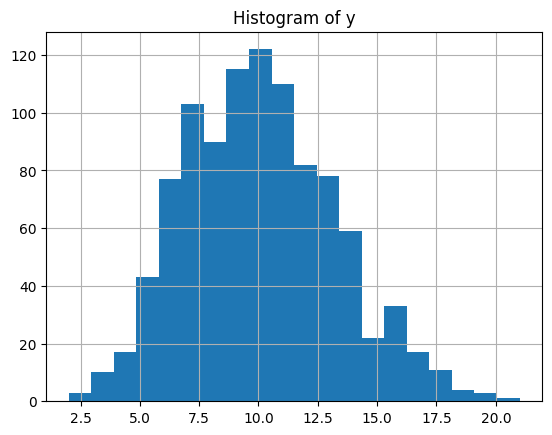

In [123]:
dataframe['y'].hist(bins=20)
plt.title("Histogram of y")

Text(0.5, 1.0, 'Ratio of allergic reactions - histogram')

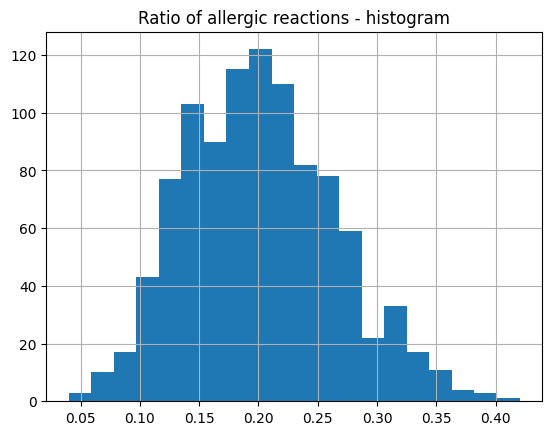

In [124]:
# computing ratio of allergic reactions for each sample
ratio = dataframe['y'] / 50
ratio.hist(bins=20)
plt.title("Ratio of allergic reactions - histogram")

In [125]:
# verifying mean of the ratio
mean = ratio.mean()
print("Mean =", mean)

Mean = 0.20026000000000002


Calculated mean of the ratio is consistent with prior knowledge (it is approximately equal to 0,2). Assigned a priori *p* has a beta distribution with α = 20 and β = 80, hence the expected value is equal to 0,2.

**Modeling posterior and posterior predictive distribution**

In [126]:
gen_quant = CmdStanModel(stan_file='code_2.stan')

DEBUG:cmdstanpy:found newer exe file, not recompiling


In [127]:
# generating default number of samples
samples = gen_quant.sample(data={'N':50, 'y':7})


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3l4h73mi/kzbhy499.json
DEBUG:cmdstanpy:cmd: /content/code_2 info
cwd: None
20:40:01 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_2', 'id=2', 'random', 'seed=44239', 'data', 'file=/tmp/tmp3l4h73mi/kzbhy499.json', 'output', 'file=/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/code_2', 'id=1', 'random', 'seed=44239', 'data', 'file=/tmp/tmp3l4h73mi/kzbhy499.json', 'output', 'file=/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/code_2', 'id=3', 'random', 'seed=44239', 'data', 'file=/tmp/tmp3l4h73mi/kzbhy499.json', 'output', 'file=/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
D

20:40:01 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/code_2', 'id=1', 'random', 'seed=44239', 'data', 'file=/tmp/tmp3l4h73mi/kzbhy499.json', 'output', 'file=/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_1.csv
 console_msgs (if any):
	/tmp/tmp3l4h73mi/code_2zi36tcv3/code_2-20230329204001_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = 0 (Default)
    thin = 1 (Default)
    adapt
      engaged = 1 (Default)
      gamma = 0.050000000000000003 (Default)
      delta = 0.80000000000000004 (Default)
      kappa = 0.75 (Defaul

In [128]:
dataframe = samples.draws_pd()
dataframe

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-70.8078,0.988295,1.06669,1.0,1.0,0.0,70.8125,0.166340,11.0
1,-71.6239,0.788950,1.06669,1.0,3.0,0.0,72.1240,0.224935,10.0
2,-70.7963,1.000000,1.06669,1.0,3.0,0.0,71.4012,0.193349,11.0
3,-70.7963,0.607302,1.06669,1.0,3.0,0.0,73.0333,0.193349,10.0
4,-70.7164,1.000000,1.06669,1.0,3.0,0.0,70.7775,0.183832,6.0
...,...,...,...,...,...,...,...,...,...
3995,-70.7399,0.985326,1.12242,1.0,3.0,0.0,70.9298,0.187884,5.0
3996,-71.4995,0.820738,1.12242,1.0,3.0,0.0,71.5089,0.221612,10.0
3997,-71.2443,1.000000,1.12242,1.0,1.0,0.0,71.5588,0.213935,14.0
3998,-70.7380,1.000000,1.12242,1.0,3.0,0.0,71.0811,0.187630,11.0


Text(0.5, 1.0, 'Histogram of y_pred')

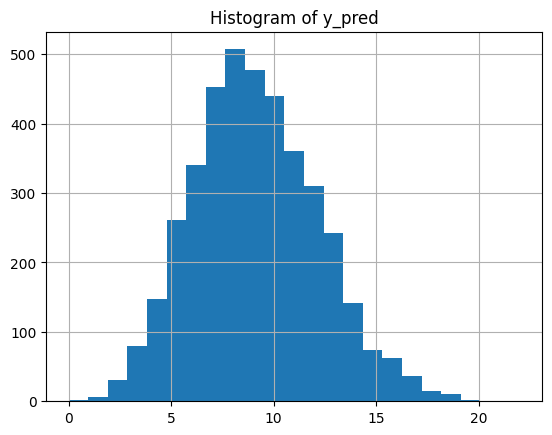

In [129]:
dataframe['y_pred'].hist(bins=23)
plt.title("Histogram of y_pred")

Text(0.5, 1.0, 'Ratio of allergic reactions - histogram')

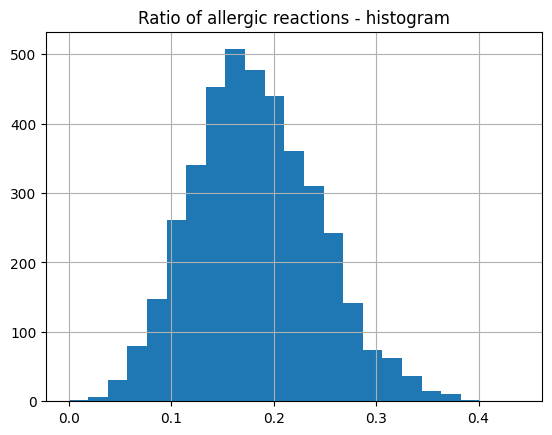

In [130]:
# computing ratio of allergic reactions for each sample
ratio = dataframe['y_pred'] / 50
ratio.hist(bins=23)
plt.title("Ratio of allergic reactions - histogram")


In [131]:
# computing the expected value and 94% density interval of the predicted ratio and parameter p
pred_ratio_ev = ratio.mean()
pred_ratio_hdi = az.hdi(np.array(ratio), 0.94)
print(f"Predicted ratio: expected value equals {pred_ratio_ev:.4f} and 94% HDI equals {pred_ratio_hdi}")

p_ev = dataframe['p'].mean()
p_hdi = az.hdi(np.array(dataframe['p']), 0.94)
print(f"Parameter p: expected value equals {p_ev:.4f} and 94% HDI equals {p_hdi}")

Predicted ratio: expected value equals 0.1813 and 94% HDI equals [0.06 0.3 ]
Parameter p: expected value equals 0.1805 and 94% HDI equals [0.122244 0.239901]


In [132]:
# computing probability that ratio is lower than the average probability
average_prob = 0.2
prob = np.mean(ratio < average_prob)
print("Probability that ratio is lower than the average probability equals", prob)

Probability that ratio is lower than the average probability equals 0.57575
